Homework 3

Math Tools for Neural and Cog Sci

Reuben Feinman

# Problem #1

In [69]:
from __future__ import division, print_function
import scipy.io as sio
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

np.random.seed(0)

In [2]:
# Load the data matrix 'M'
M = sio.loadmat('PCA.mat')['M']
print(M.shape)

(150, 14)


## (a)

In [3]:
# Create new matrix M_tilde. From each row of M, 
# subtract the mean of that row to get M_tilde row.
M_means = M.mean(axis=1)
M_tilde = np.zeros_like(M)
for i in range(M.shape[0]):
    M_tilde[i] = M[i] - M_means[i]

In [4]:
def svd(matrix):
    """
    A wrapper for numpy's SVD because numpy returns 
    singular values as an array (weird).
    """
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

Recalling from class, for a matrix $\tilde{M}$ with SVD decomposition $\tilde{M} = USV^T$, the eigenvalue decomposition of the matrix $\tilde{M}^T\tilde{M}$ comes out to be $\tilde{M}^T\tilde{M} = V(S^TS)V^T$. Thus, the eigenvalues are the diagonal values of the matrix $S^TS$ (i.e. the singular values in $S$, squared) and the eigenvectors are the columns of $V$.

In [5]:
U, S, Vh = svd(M_tilde)

In [6]:
# Display the eigenvectors
print('Eigenvectors:')

for i, vec in enumerate([Vh[i] for i in range(Vh.shape[0])]):
    print("%0.2i: " % i, vec)

Eigenvectors:
00:  [-0.34143835 -0.33846835 -0.37687186 -0.3557049   0.36366401  0.33460358
  0.34944241  0.35842609  0.04261714  0.02373688  0.02573544 -0.03038708
 -0.03021717 -0.02513782]
01:  [-0.02423879 -0.03019751 -0.01767955 -0.02606894  0.01801246  0.06887694
  0.00676668  0.01671515 -0.4127319  -0.40326387 -0.40990575  0.40921324
  0.39697884  0.407523  ]
02:  [-0.55129212 -0.14594673  0.46450842  0.2928906   0.34870855 -0.29523731
 -0.1355069   0.18216142 -0.19011749  0.08258217  0.01838775  0.18642319
 -0.09970516 -0.15785641]
03:  [ 0.02534686 -0.4013639   0.45884303 -0.37096648 -0.16186625 -0.04545518
  0.3820342  -0.4101125   0.18592648 -0.02634879  0.10278505  0.26044253
  0.13083584 -0.13010088]
04:  [ -1.67924081e-02  -3.38506670e-01   1.26916926e-01  -4.67105251e-02
  -2.36124384e-01   1.27469205e-01  -1.17435675e-01   8.72609905e-05
  -3.48130797e-01   6.39901632e-01  -2.02988546e-02  -2.46311798e-01
   4.29822411e-02   4.32953847e-01]
05:  [ 0.17159172  0.23975715 

In [7]:
D = np.matmul(S.T, S)
eigenvalues = [D[i,i] for i in range(len(D))]

Let's go ahead and plot the eigenvalues now.

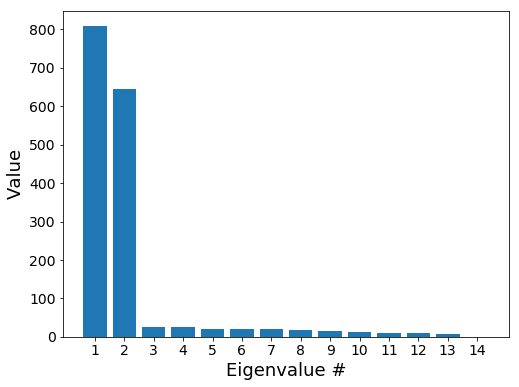

In [8]:
# eigenvalue indices
inds = list(range(1, len(eigenvalues)+1))
plt.figure(figsize=(8,6))
plt.bar(inds, eigenvalues)
plt.xticks(inds, fontsize='14')
plt.yticks(fontsize='14')
plt.xlabel('Eigenvalue #', fontsize='18')
plt.ylabel('Value', fontsize='18')
plt.show()

In [9]:
sum(eigenvalues)

1639.5914464575887

I think that this dataset has a "true" dimensionality of 2. As you can see by the eigenvalues, the majority of the variance in the data (nearly 90%) occurs along the first 2 principle component axes. The 3rd eigenvalue shows a very sharp decline from the first 2.

## (b)

In [10]:
# Compute projection onto the first principle component
proj1 = np.matmul(M_tilde, Vh[0])

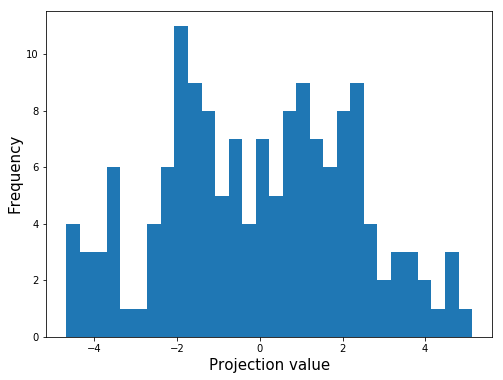

In [11]:
# Plot a histogram of the projected values
plt.figure(figsize=(8,6))
plt.hist(proj1, bins=30)
plt.xlabel('Projection value', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [12]:
# Show that the sum of squares of the projected values is equal 
# to the first eigenvalue (within small precision error)
sum_of_squares1 = np.sum(np.square(proj1))
assert np.abs(sum_of_squares1 - eigenvalues[0]) < 1e-3
print('First eigenvalue: %0.3f' % eigenvalues[0])
print('Sum of squares: %0.3f' % sum_of_squares1)

First eigenvalue: 808.577
Sum of squares: 808.577


In [13]:
# To compute what portion of the variance lies along this component,
# we must compute what portion of the total eigenvalue mass lies in
# this eigenvalue
portion = eigenvalues[0]/np.sum(eigenvalues)
print('Portion of the variance that lies along PC 1: %0.2f%%' % (100*portion))

Portion of the variance that lies along PC 1: 49.32%


## (c)

In [14]:
# Compute projection onto the first two components
proj1and2 = np.matmul(M_tilde, Vh[:2].T)

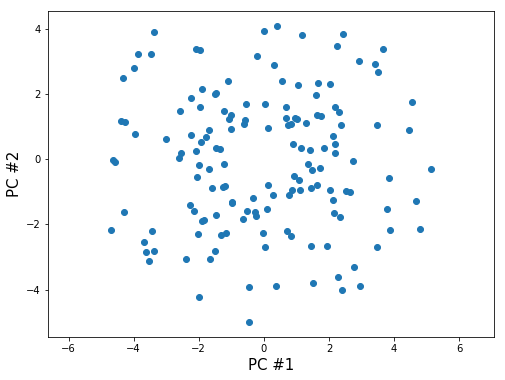

In [15]:
# Show a scatter plot of the first 2 principle components, using
# equal scales on the two axes
plt.figure(figsize=(8,6))
plt.scatter(proj1and2[:,0], proj1and2[:,1])
plt.axis('equal')
plt.xlabel('PC #1', fontsize=15)
plt.ylabel('PC #2', fontsize=15)
plt.show()

In [16]:
# Show that the sum of the squared lengths of these vectors
# is equal to lambda1 + lambda2 (within precision error)
lengths = np.linalg.norm(proj1and2, axis=1)
sum_of_squares1and2 = np.sum(np.square(lengths))
assert np.abs(sum_of_squares1and2 - (eigenvalues[0] + eigenvalues[1])) < 1e-3
print('Sum of lambda1 + lambda2: %0.3f' % (eigenvalues[0] + eigenvalues[1]))
print('Sum of squared lengths of projected vectors: %0.3f' % sum_of_squares1and2)

Sum of lambda1 + lambda2: 1452.596
Sum of squared lengths of projected vectors: 1452.596


## (d)

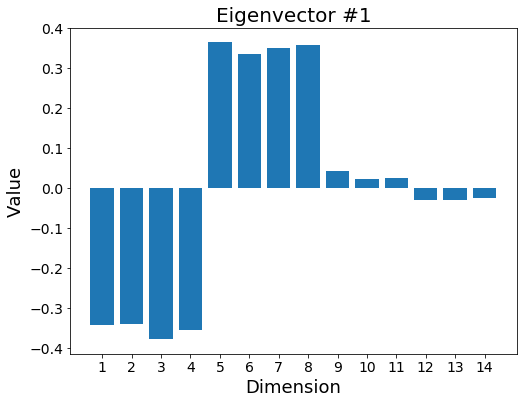

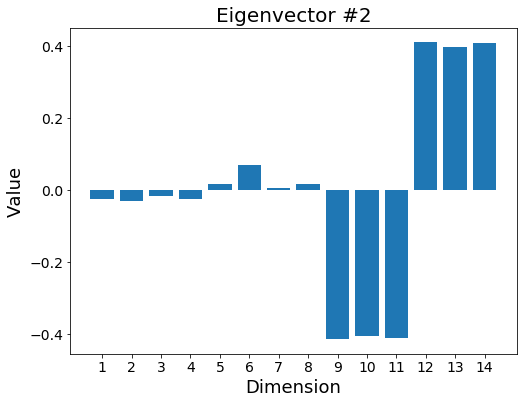

In [17]:
# Let's plot eigenvectors 1 & 2.
inds = list(range(1, 15))
# starting with 1:
plt.figure(figsize=(8,6))
plt.title('Eigenvector #1', fontsize=20)
plt.bar(inds, Vh[0])
plt.xticks(inds, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dimension', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.show()
print('\n')
# now 2:
plt.figure(figsize=(8,6))
plt.title('Eigenvector #2', fontsize=20)
plt.bar(inds, Vh[1])
plt.xticks(inds, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Dimension', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.show()

Eigenvector \#1 prefers a vector with negative values in dimensions 1-4 and positive values in dimensions 5-8. The values of dimensions 9-14 have negligible impact for this filter.

Eigenvector \#2 prefers a vector with negative values in dimensions 9-11 and positive values in dimensions 12-14. The values of dimensions 1-8 have negligible impact.

It would be possible to categorize... TODO

# Problem #2

## 2.35

### (a)

In [18]:
# Let's use a padded vector to represent the x's and y's.
# See the comment for the indices

#  index:     [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]
x1 = np.array([ 0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0])
x2 = np.array([ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0])
x3 = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0])

y1 = np.array([ 0,  0,  0,  0,  0,  0,  0,  2,  3,  0,  0,  0,  0])
y2 = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  2,  4,  0,  0,  0])
y3 = np.array([ 0,  0,  0,  0,  3,  2,  0,  0,  0,  0,  0,  0,  0])

Let $\tilde{x_2}$ represent the vector $\vec{x_2}$ shifted $1$ timestep to the left.

In [19]:
x2_tilde = np.roll(x2, -1)

Then the output $T(\tilde{x_2})$ is equivalent to the vector $T(\vec{x_2})$ shifted $1$ timestep to the left, since the system $T$ is time invariant.

In [20]:
y2_tilde = np.roll(y2, -1)

Now, note that $\vec{x_1} = \vec{x_2} + \frac{1}{2}\tilde{x_2}$

In [21]:
# cast index and x1 to float here for the sake of visualization 
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('x1: \n\t', np.asarray(x1, dtype=np.float))
print('x2+0.5*x2_tilde: \n\t', x2+0.5*x2_tilde)
np.array_equal(x1, x2+0.5*x2_tilde)

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
x1: 
	 [ 0.  0.  0.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.]
x2+0.5*x2_tilde: 
	 [ 0.  0.  0.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.]


True

and thus $T(\vec{x_1}) = T(\vec{x_2} + \frac{1}{2}\tilde{x_2})$. For the system $T$ to be linear, by the principle of superposition we would need to have it be the case that $T(\vec{x_2} + \frac{1}{2}\tilde{x_2}) = T(\vec{x_2}) + \frac{1}{2}T(\tilde{x_2})$, i.e. that $T(\vec{x_1}) = T(\vec{x_2}) + \frac{1}{2}T(\tilde{x_2})$. Let's check if this is the case:

In [22]:
# cast index and y1 to float here for the sake of visualization
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('T(x1): \n\t', np.asarray(y1, dtype=np.float))
print('T(x2)+0.5*T(x2_tilde): \n\t', y2+0.5*y2_tilde)
np.array_equal(y1, y2 + 0.5*y2_tilde)

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
T(x1): 
	 [ 0.  0.  0.  0.  0.  0.  0.  2.  3.  0.  0.  0.  0.]
T(x2)+0.5*T(x2_tilde): 
	 [ 0.  0.  0.  0.  0.  0.  0.  1.  4.  4.  0.  0.  0.]


False

This is not the case, so the system cannot be linear.

### (b)

Assume we are given $\delta[n]$, a vector that is $0$ everywhere except at index $n=0$, where it is $1$.

In [23]:
#  index:        [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]
delta = np.array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0])

Note that $\delta[n]$ is equivalent to the vector $\vec{x_3}$ shifted $4$ steps to the left.

In [24]:
# cast index and x1 to float here for the sake of visualization 
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('delta: \n\t', np.asarray(delta, dtype=np.float))
print('x3 shifted: \n\t', np.asarray(np.roll(x3, -4), dtype=np.float))
np.array_equal(delta, np.roll(x3, -4))

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
delta: 
	 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
x3 shifted: 
	 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


True

Since the system $T$ is time invariant, this means that $T(\delta[n])$ must be equivalent to $T(\vec{x_3})$ shifted $4$ steps to the left. Thus, $T(\delta[n])$ is the following vector:

In [25]:
print('T(delta): \n\t', np.asarray(np.roll(y3, -4), dtype=np.float))

T(delta): 
	 [ 3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


i.e. the vector with value $3$ at $n=-6$, value $2$ at $n=-5$, and $0$ elsewhere.

### (c)

Since the system $T$ is time-invariant, we can determine the response of $T$ for any vector that is a time-shifted version of $\vec{x_1}$, $\vec{x_2}$ or $\vec{x_3}$, since we know the responses for these $3$ vectors. If the system were linear, we would be able to determine the response for linear combinations of these $3$ vectors, however this is not the case. Thus, we can only determine responses for input vectors that are time-shifted versions of $\vec{x_1}$, $\vec{x_2}$ or $\vec{x_3}$.

## 2.36

### (a)

In [26]:
#  index:     [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]
x1 = np.array([ 0,  0,  0,  0,  0, -2,  1, -2,  0,  0,  0,  0,  0])
x2 = np.array([ 0,  0,  0,  0,  0, -2,  1,  0,  0,  0,  0,  0,  0])
x3 = np.array([ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0])

y1 = np.array([ 0,  0,  0,  0,  0, -1,  3,  3,  0,  1,  0,  0,  0])
y2 = np.array([ 0,  0,  0,  0,  0, -1,  1, -3,  0, -1,  0,  0,  0])
y3 = np.array([ 0,  0,  0,  0,  2,  1, -3,  0,  2,  0,  0,  0,  0])

First, note that $-\frac{1}{2}\vec{x_1} + \frac{1}{2}\vec{x_2}$ is the impulse vector at $n=1$:

In [27]:
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('-0.5*x1 + 0.5*x2: \n\t', -0.5*x1 + 0.5*x2)

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
-0.5*x1 + 0.5*x2: 
	 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


For clarity let's denote it $\vec{\delta[1]}$. Next, note that $\frac{1}{2}\vec{x_1} - \frac{1}{2}\vec{x_2} + \vec{x_3}$ is the impulse vector at $n=0$:

In [28]:
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('0.5*x1 - 0.5*x2 + x3: \n\t', 0.5*x1 - 0.5*x2 + x3)

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
0.5*x1 - 0.5*x2 + x3: 
	 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


For clarity let's denote it $\vec{\delta[0]}$. Note that $\vec{\delta[0]}$ is just the vector $\vec{\delta[1]}$ shifted $1$ spot to the left, and due to the linearity of the system $L$, we can compute $L(\vec{\delta[0]})$ and $L(\vec{\delta[1]})$. Let's go ahead and do that now:

In [29]:
delta_1 = -0.5*x1 + 0.5*x2
delta_0 = 0.5*x1 - 0.5*x2 + x3
L_delta_1 = -0.5*y1 + 0.5*y2
L_delta_0 = 0.5*y1 - 0.5*y2 + y3

For the system to be time invariant, since $\vec{\delta[0]}$ is equal to $\vec{\delta[1]}$ shifted $1$ spot to the left, we would need to have that $L(\vec{\delta[0]})$ is equal to $L(\vec{\delta[1]})$ shifted $1$ spot to the left. Let's check if that's the case:

In [30]:
print('Index: \n\t', np.asarray(range(-6,7), dtype=np.float))
print('L_delta_0: \n\t', L_delta_0)
print('L_delta_1: \n\t', L_delta_1)
np.array_equal(L_delta_0, L_delta_1)

Index: 
	 [-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
L_delta_0: 
	 [ 0.  0.  0.  0.  2.  1. -2.  3.  2.  1.  0.  0.  0.]
L_delta_1: 
	 [ 0.  0.  0.  0.  0.  0. -1. -3.  0. -1.  0.  0.  0.]


False

This is not the case, so the system cannot be time invariant.

### (b)

Assume we are given $\delta[n]$, a vector that is $0$ everywhere except at index $n=0$, where it is $1$.

In [31]:
#  index:        [-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6]
delta = np.array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0])

Note that $\delta[n] = \frac{1}{2}\vec{x_1} - \frac{1}{2}\vec{x_2} + \vec{x_3}$:

In [32]:
# convert delta to float here for sake of visualization
print('delta: \n\t', np.asarray(delta, dtype=np.float))
print('0.5*x1 - 0.5*x2 + x3: \n\t', 0.5*x1 - 0.5*x2 + x3)
np.array_equal(delta, 0.5*x1 - 0.5*x2 + x3)

delta: 
	 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
0.5*x1 - 0.5*x2 + x3: 
	 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


True

Since the system $L$ is linear, we have that $T(\delta[n]) = T(\frac{1}{2}\vec{x_1} - \frac{1}{2}\vec{x_2} + \vec{x_3}) = \frac{1}{2}T(\vec{x_1}) - \frac{1}{2}T(\vec{x_2}) + T(\vec{x_3})$. So let's calculate and print $T(\delta[n])$:

In [33]:
print('T(delta): \n\t', 0.5*y1 - 0.5*y2 + y3)

T(delta): 
	 [ 0.  0.  0.  0.  2.  1. -2.  3.  2.  1.  0.  0.  0.]


# Problem #3

In [34]:
# NOTE: grader must have Python bindings for MATLAB installed.
# See here for details: https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html
import os
import matlab.engine
eng = matlab.engine.start_matlab()
eng.addpath(os.path.realpath('.'),nargout=0)

## (a)

In [35]:
def unknownSystemX(vec, X):
    """
    A wrapper function for the matlab function unknownSystemX.
    Does the necessary data type transformations to the input, 
    calls the matlab function, transforms the output back 
    into numpy, and returns.
    """
    assert X in [1,2,3], 'paramter X must be an integer thats either 1, 2 or 3.'
    vec_m = matlab.double(vec.tolist())
    if X == 1:
        output = eng.unknownSystem1(vec_m)
    elif X == 2:
        output = eng.unknownSystem2(vec_m)
    else:
        output = eng.unknownSystem3(vec_m)
        
    return np.asarray(output)

def createImpulseColumnVec(n, D=64):
    """
    Creates a column vector of dimensionality D that is an impulse 
    vector with value 1 at entry n.
    """
    x = np.zeros((D, 1))
    x[n,0] = 1
    return x

First I will test that each system is shift-invariant by observing the response to an impulse vector at n=0 and then a few successive impulse vectors

In [36]:
def checkShiftInvariantAndCircular(X, verbose=False):
    """
    A function to test the shift invariance of unknownSystemX.
    Measures response to an impulse at n=0 and compares shifted
    versions of this response to the responses of impulses at a
    few later positions. Also checks on the periodic boundary-handling.
    """
    # first observe response to impulse vector at n=0
    x0 = createImpulseColumnVec(0)
    y0 = unknownSystemX(x0, X)
    # cycle through and check the first 5
    for i in range(1, 6):
        # observe response to impulse vector at n=i
        x = createImpulseColumnVec(i)
        y = unknownSystemX(x, X)
        # compare it to response of n=0 shifted by i
        y0_shifted = np.roll(y0, i)
        assert np.array_equal(y, y0_shifted), \
        'Test failed: unknownSystem%i is not shift-invariant.' % X
        if verbose:
            print('y[%i]: \n' % i, y.reshape(-1,))
            print('y[0] shifted by %i: \n' % i, y0_shifted.reshape(-1,))
            print('\n')
            
    # now, check for circular boundary handling. Shift impulse vector
    # backwards and check for equality
    for i in range(-6, 0):
        # observe response to impulse vector at n=i
        x = createImpulseColumnVec(i)
        y = unknownSystemX(x, X)
        # compare it to response of n=0 shifted by i
        y0_shifted = np.roll(y0, i)
        assert np.array_equal(y, y0_shifted), \
        'Test failed: unknownSystem%i does not have circular boundary handling.' % X
        if verbose:
            print('y[%i]: \n' % i, y.reshape(-1,))
            print('y[0] shifted by %i: \n' % i, y0_shifted.reshape(-1,))
            print('\n')
    
    print('Test passed: unknownSystem%i is shift-invariant and has circular boundary handling.' % X)

In [37]:
# note to grader: call these functions with verbose=True to visualize the tests
checkShiftInvariantAndCircular(X=1)

Test passed: unknownSystem1 is shift-invariant and has circular boundary handling.


In [38]:
checkShiftInvariantAndCircular(X=2)

Test passed: unknownSystem2 is shift-invariant and has circular boundary handling.


In [39]:
checkShiftInvariantAndCircular(X=3)

AssertionError: Test failed: unknownSystem3 does not have circular boundary handling.

So we see that systems 1 & 2 are shift invariant w/ circular boundary handling, but not system 3. Now, let's check for each of these systems whether the response to a sum of two impulses is equal to the sum of their individual responses.

In [49]:
def checkLinearity(X, verbose=False):
    """
    Function to check the linearity of unknownSystemX. To do this,
    we check that the response to a sum of two different impulse 
    vectors is equal to the sum of their individual responses.
    """
    # define two input vectors
    x0 = createImpulseColumnVec(0)
    x1 = createImpulseColumnVec(1)
    # compute their individual responses
    y0 = unknownSystemX(x0, X)
    y1 = unknownSystemX(x1, X)
    # compute the response to the sum of these two vectors
    y_sum = unknownSystemX(x0+x1, X)
    # if 'verbose' option is set, let's print out our comparison
    if verbose:
        print('Sum of responses to individual impulse vectors: \n', (y0+y1).reshape(-1,))
        print('Response to the sum of impulse vectors: \n', y_sum.reshape(-1,))
    # check that it is equal to the sum of their individual responses
    assert np.array_equal(y_sum, y0+y1), 'Test failed: unknownSystem%i is not linear.' % X
    print('Test passed: unknownSystem%i is linear' % X)

In [51]:
# note to grader: call these functions with verbose=True to visualize the tests
checkLinearity(X=1)

Test passed: unknownSystem1 is linear


In [52]:
checkLinearity(X=2)

Test passed: unknownSystem2 is linear


In [53]:
checkLinearity(X=3)

Test passed: unknownSystem3 is linear


## (b)

Since the question says "if the previous tests were positive" we will exclude unknownSystem3 from here onward because it failed the previous tests.

In [259]:
def examineResponse(freq, X):
    """
    A function to examine unknownSystemX's response to a sinusoid
    of a specified frequency, and to compare it to the input.
    The DFT of the output will also be computed and used to
    determine whether the outputs are sinusoids of the same
    frequency as the inputs.
    """
    # get the input bins
    x = np.asarray([freq*n for n in range(64)]).reshape(64, 1)
    # compute a random phase
    phi = np.random.normal(0, np.pi/4)
    # compute the sinusoid, then get system output
    sinusoid = np.cos(x-phi)
    output = unknownSystemX(sinusoid, X)
    # Plot the input and the output
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,3))
    ax1.plot(x, sinusoid)
    ax1.set_title('System input')
    ax2.plot(x, output)
    ax2.set_title('System output')
    plt.show()
    
    # Now, compute the DFT, taking the magnitude of
    # each value. 
    fft = np.abs(np.fft.fft(output.reshape(64,)))
    plt.figure()
    # We only need to observe the first 32 values because the DFT 
    # is conjucate symmetric around N/2.
    x_fft = np.asarray([2*np.pi*n/64 for n in range(32)])
    plt.plot(x_fft, fft[:32])
    plt.title('DFT of system output')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.grid()
    plt.show()

Let's begin with system #1

frequency = 2pi/64 = 0.098:


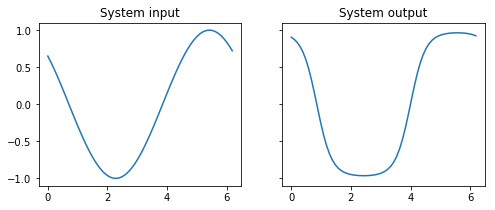

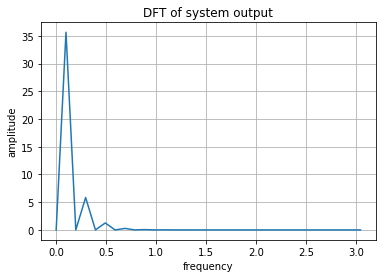

frequency = 4pi/64 = 0.196:


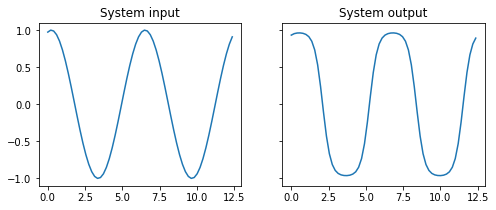

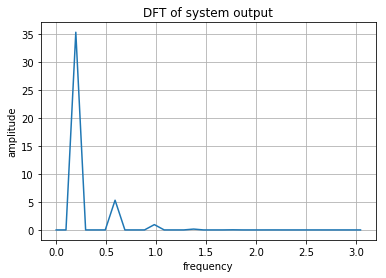

frequency = 6pi/64 = 0.295:


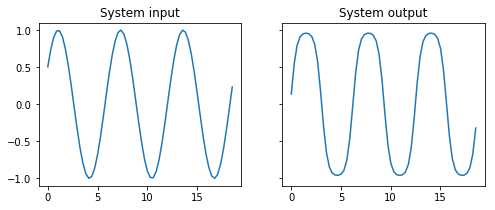

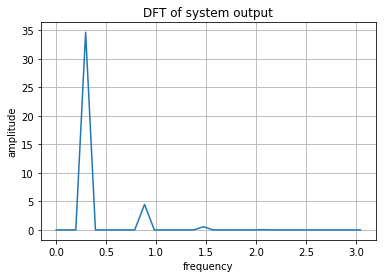

frequency = 12pi/64 = 0.589:


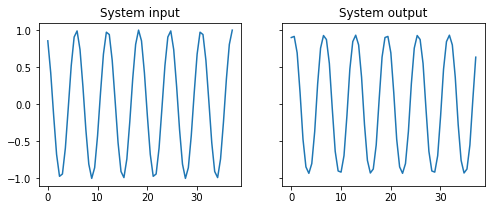

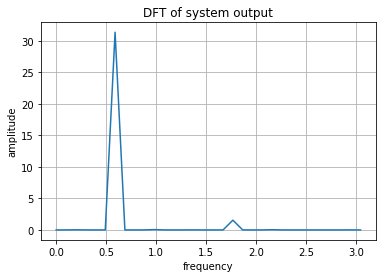

In [260]:
print('frequency = 2pi/64 = %0.3f:' % (2*np.pi/64))
examineResponse(2*np.pi/64, X=1)
print('frequency = 4pi/64 = %0.3f:' % (4*np.pi/64))
examineResponse(4*np.pi/64, X=1)
print('frequency = 6pi/64 = %0.3f:' % (6*np.pi/64))
examineResponse(6*np.pi/64, X=1)
print('frequency = 12pi/64 = %0.3f:' % (12*np.pi/64))
examineResponse(12*np.pi/64, X=1)

So we see here that the output is not a sinusoid of the same frequency. Computing the DFT of the system outputs, we see that there are non-zero responses at more than one frequency. Thus, the output vectors cannot possibly lie completely within the subspace containing the sinusoids of their specified input frequency.

Now let's check system #2

frequency = 2pi/64 = 0.098:


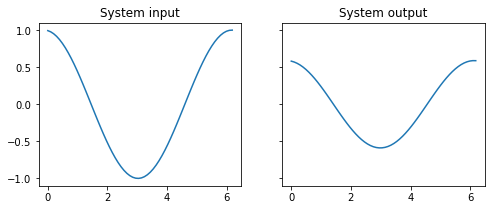

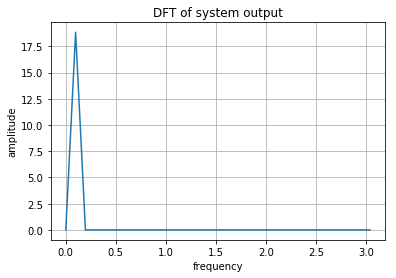

frequency = 4pi/64 = 0.196:


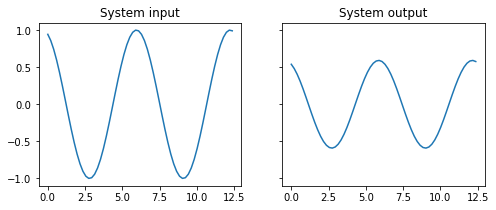

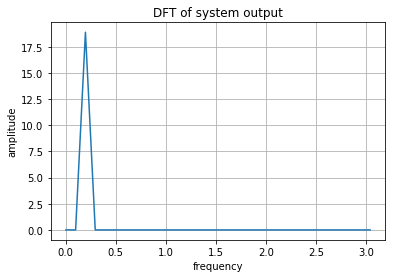

frequency = 6pi/64 = 0.295:


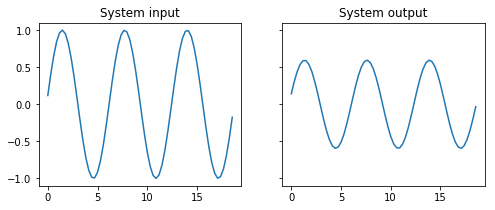

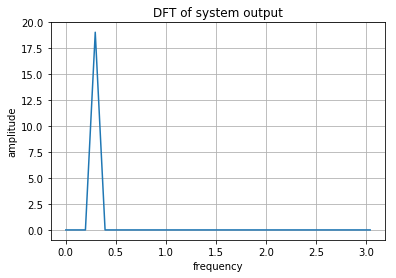

frequency = 12pi/64 = 0.589:


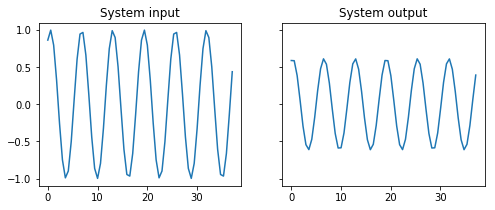

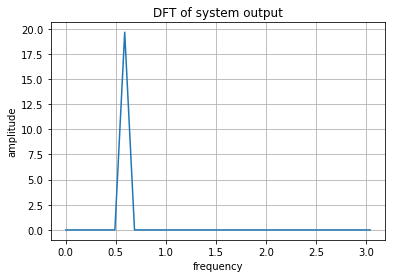

In [261]:
print('frequency = 2pi/64 = %0.3f:' % (2*np.pi/64))
examineResponse(2*np.pi/64, X=2)
print('frequency = 4pi/64 = %0.3f:' % (4*np.pi/64))
examineResponse(4*np.pi/64, X=2)
print('frequency = 6pi/64 = %0.3f:' % (6*np.pi/64))
examineResponse(6*np.pi/64, X=2)
print('frequency = 12pi/64 = %0.3f:' % (12*np.pi/64))
examineResponse(12*np.pi/64, X=2)

Here, we see that the output is a sinusoid of the same frequency as the input. We know this because, looking at the DFT of the system outputs, we see that there is always only one non-zero response, and that it is always at the correct location on the x-axis (i.e. the x value is the input frequency value). For instance, with $freq = \frac{2\pi}{64}$ we see that it occurs at $0.098$, with $freq = \frac{4\pi}{64}$ we see that it occurs at $0.196$, etc. Thus the output vector always lies completely in the subspace containing the sinusoids of the corresponding frequency.

## (c)

Since system #2 is the only system remaining that passed all tests, we will only look at this system here.

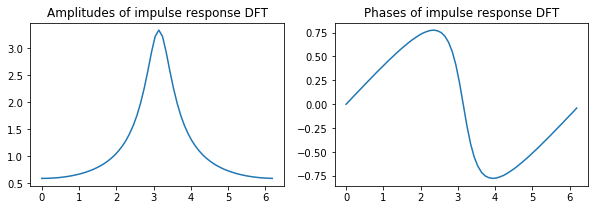

In [275]:
import cmath

# create an impulse vector like in (a)
x_imp = createImpulseColumnVec(0)
# get the impulse response for system 2
y_imp = unknownSystemX(x_imp, X=2)
# Now, compute the DFT
fft_imp = np.fft.fft(y_imp.reshape(-1,))
# Get the amplitudes by taking abs
fft_imp_amplitudes = np.abs(fft_imp)
# Get the phases using cmath.phase()
fft_imp_phases = np.asarray([cmath.phase(elt) for elt in fft_imp])
# Signal the frequencies of the DFT for plotting pursposes
x_fft = np.asarray([2*np.pi*n/64 for n in range(64)])
# plot amplitudes
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,3))
# plot amplitudes
ax1.plot(x_fft, fft_imp_amplitudes)
ax1.set_title('Amplitudes of impulse response DFT')
# plot phases
ax2.plot(x_fft, fft_imp_phases)
ax2.set_title('Phases of impulse response DFT')
plt.show()

In [288]:
def computeChanges(freq):
    """
    For a given frequency parameter, this function
    creates a sinusoid vector of that frequency with
    64 bins and a random offset. It computes the amplitude
    and phase of both the original sinusoid and the 
    response of unknownSystem2 to that sinusoid. Then, it
    computes the change in amplitude and phase from input
    to output. It returns these 2 change values.
    """
    # get the input bins
    x = np.asarray([freq*n for n in range(64)]).reshape(64, 1)
    # compute a random phase
    phi = np.random.normal(0, np.pi/4)
    # compute the sinusoid
    sinusoid = np.cos(x-phi)
    # compute the DFT of the input sinusoid
    fft_sin = np.fft.fft(sinusoid.reshape(64,))
    # compute its amplitudes and phases
    fft_sin_amplitudes = np.abs(fft_sin)
    fft_sin_phases = np.asarray([cmath.phase(elt) for elt in fft_sin])
    # compute the index of the maximum amplitude
    fft_sin_max_ind = np.argmax(fft_sin_amplitudes[:32])
    
    # compute the system output for the input sinusoid
    output = unknownSystemX(sinusoid, 2)
    # compute the DFT of the system output
    fft_out = np.fft.fft(output.reshape(64,))
    # compute its amplitudes and phases
    fft_out_amplitudes = np.abs(fft_out)
    fft_out_phases = np.asarray([cmath.phase(elt) for elt in fft_out])
    # compute the index of the maximum amplitude
    fft_out_max_ind = np.argmax(fft_out_amplitudes[:32])
    
    # compute changes in amplitude and phase
    amplitude_change = fft_out_amplitudes[fft_out_max_ind]/fft_sin_amplitudes[fft_sin_max_ind]
    phase_change = np.mod(fft_out_phases[fft_out_max_ind] - fft_sin_phases[fft_sin_max_ind], 2*np.pi)
    
    # return the amplitude change, the phase change, and the index of the max 
    # FFT response to the input
    return amplitude_change, phase_change, fft_sin_max_ind

In [289]:
# Step through the different frequencies, and for each, verify that the 
# change in amplitude from input to output is predicted by the amplitude
# and phase of the corresponding terms of the Fourier transform of the
# impulse response
for i in [2, 4, 6, 12]:
    # compute changes in amplitude and phase for this frequency
    amplitude_change, phase_change, sin_phase_ind = computeChanges(i*np.pi/64)
    # check that the change in amplitude equals the predicted change, within
    # reasonable precision error
    assert np.abs(amplitude_change - fft_imp_amplitudes[sin_phase_ind]) < 1e-5
    # check that the change in phase equals the predicted change, within reasonable
    # precision error
    assert np.abs(phase_change - fft_imp_phases[sin_phase_ind]) < 1e-5
print('All tests pass! Predicted changes and actual changes are equivalent.')

All tests pass! Predicted changes and actual changes are equivalent.


# Problem #4

## (a)

In [241]:
def create_filter(sigma, omega, N):
    """
    A function to create the filter that is a product
    of a Gaussian and a sinusoid
    """
    # First, create the grid of 25 samples. It should be centered at
    # the middle (13th) sample.
    grid = np.asarray(range(-12, 13))
    # Now compute the filter
    filt = np.asarray([np.exp(-n*n/(2*sigma*sigma))*np.cos(omega*n) for n in grid])
    
    # return both grid and filter
    return grid, filt

In [242]:
# create the filter
grid, filt = create_filter(3.5, 2*np.pi*10/64, 25)

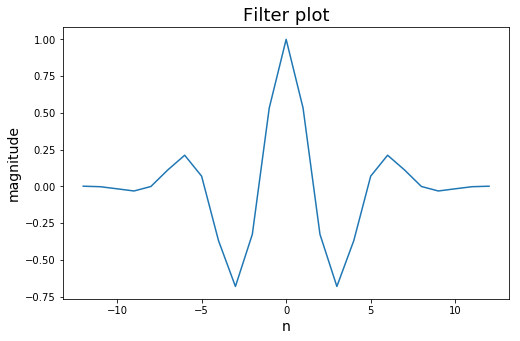

In [258]:
# plot the filter
plt.figure(figsize=(8,5))
plt.title('Filter plot', fontsize=18)
plt.plot(grid, filt)
plt.xlabel('n', fontsize=14)
plt.ylabel('magnitude', fontsize=14)
plt.show()

Yes, the filter looks like what I'd expect for a linear filter that is a product of a Gaussian and a sinusoid.

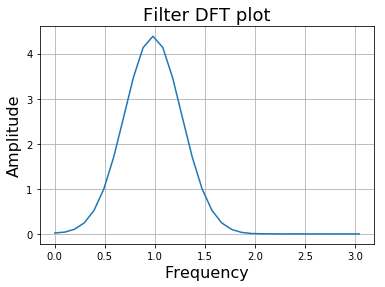

In [265]:
# Now plot the amplitude of the DFT of this filter
fft = np.abs(np.fft.fft(filt, 64))
plt.title('Filter DFT plot', fontsize=18)
# Only need to plot the first 32 since the DFT is conjugate symmetric
# about N/2
x_fft = np.asarray([2*np.pi*n/64 for n in range(32)])
plt.plot(x_fft, fft[:32])
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.grid()
plt.show()

In [267]:
print('Note that 2*pi*10/64 = %0.3f' % (2*np.pi*10/64))

Note that 2*pi*10/64 = 0.982


This is a band pass filter, like we learned about in class. It has this shape because the filter prefers a frequency of $2\pi\frac{10}{64}$ (or $0.982$) and it's preference falls off with distance from this value in a Gaussian manner. The paramter $\omega$ determines the center frequency (i.e. prefered frequency) of this band pass filter and the parameter $\sigma$ determines the spread of the band ($3.5$ in our case).

## (b)

Let's first think about the filter equation. The filter is essentially a sinusoid, except that the magnitude is scaled at different locations in time domain by a Gaussian. Since it is at base a sinusoid of frequency $\omega = 2\pi\frac{10}{64}$, this convolutional filter should be maximally selective for a sinusoid with $\omega = 2\pi\frac{10}{64}$. Now, we can also verify the optimal input frequency by finding the frequency for which the DFT has maximum amplitude. Let's do that now:

In [293]:
ind = np.argmax(np.abs(np.fft.fft(filt, 64))[:32])
freq_at_ind = x_fft[ind]
print('Optimal frequency: %0.3f' % freq_at_ind)

Optimal frequency: 0.982


This result is just what we'd hoped, as $0.982 = 2\pi\frac{10}{64}$. To compute the period of this sinusoid, recall that period is simply the inverse of frequency, i.e. the period is $\frac{64}{2\pi10}$. To convert this to units of sample spacing we simply multiply by $2\pi$, resulting in $\frac{64}{10}$.

In [296]:
print(64/10)

6.4


This makes sense looking at the plot of the filter, as the sinusoid appears to go through one cycle in about 6.4 steps.

To determine which sinusoids would produce responses with about $25\%$ of the amplitude, we can simply look at the plot of the DFT and find the frequences at which the curve is at $25\%$ of it's maximum value. This occurs at the frequencies of $2\pi\frac{5}{64}$ and $2\pi\frac{15}{64}$.

## (c)

In [290]:
grid

array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12])

In [ ]:
for freq in [2*np.pi*5/64, 2*np.pi*10/64, 2*np.pi*15/64]:
    sinusoid = np.cos()